In [77]:
import numpy as np
import pandas as pd
import os
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.models import load_model, Model

from attention import Attention

from keras.preprocessing import sequence
np.random.seed(7)

#from tensorflow.python.client import device_lib
#print(device_lib.list_local_devices())


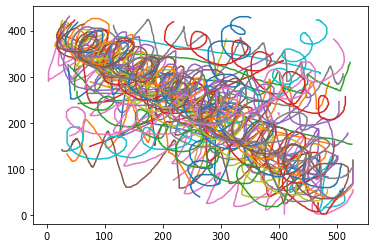

In [78]:
X=[]
y=[]
base_path='dataset/'
source_path=base_path
for child in os.listdir(source_path):
    sub_path = os.path.join(source_path, child)
    if os.path.isdir(sub_path):
        for data_file in os.listdir(sub_path):
            file_path = os.path.join(sub_path, data_file)
            #print(file_path)
            data=pd.read_csv(file_path,header=None)
            data=data.to_numpy()
            X.append(data)
            y.append(child)
from matplotlib import pyplot as plt
for x in X:
    plt.plot(x[:,0],x[:,1])
plt.show()

In [79]:
max_review_length = 300
X_tr = sequence.pad_sequences(X, maxlen=max_review_length)
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
y = lb.fit_transform(y)

In [82]:
'''
modelClass = Sequential()
modelClass.add(LSTM(100, return_sequences=True, input_shape=(300,2)))
modelClass.add(LSTM(50, return_sequences=True, activation='relu'))
modelClass.add(LSTM(20, return_sequences=True, activation='relu'))
modelClass.add(LSTM(10, activation='relu'))
modelClass.add(Dense(3, activation='sigmoid'))
modelClass.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(modelClass.summary())
modelClass.fit(X_tr, y, epochs=30, batch_size=16)
'''

# Define/compile the model.
model_input = Input(shape=(300,2))
x = LSTM(64, return_sequences=True)(model_input)
#x = LSTM(64)(model_input)
x = Attention(32)(x)
x = Dense(3, activation = 'sigmoid')(x)
model = Model(model_input, x)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

# train.
model.fit(X_tr, y, epochs=50)


Model: "model_20"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_25 (InputLayer)           [(None, 300, 2)]     0                                            
__________________________________________________________________________________________________
lstm_23 (LSTM)                  (None, 300, 64)      17152       input_25[0][0]                   
__________________________________________________________________________________________________
last_hidden_state (Lambda)      (None, 64)           0           lstm_23[0][0]                    
__________________________________________________________________________________________________
attention_score_vec (Dense)     (None, 300, 64)      4096        lstm_23[0][0]                    
___________________________________________________________________________________________

In [83]:
scores = model.evaluate(X_tr, y, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 100.00%
